## Import Libraries

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #count plot

import chart_studio.plotly as py #plotly library
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #importing logistic regression model
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

import os

## Display dataset filses

In [6]:
print(os.listdir("./dataset"))

['gender_submission.csv', 'test.csv', 'train.csv']


## Load titanic data

In [7]:
data_train = pd.read_csv('./dataset/train.csv')

data_test = pd.read_csv('./dataset/test.csv')

## View of Data

In [8]:
data_train.info()

print('==================================')

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [9]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Quality & Missing Value Assessment

In [11]:
# check missing values in train data
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Age - Missing Values - train data

In [13]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((data_train['Age'].isnull().sum()/data_train.shape[0])*100))

Percent of missing "Age" records is 19.87%


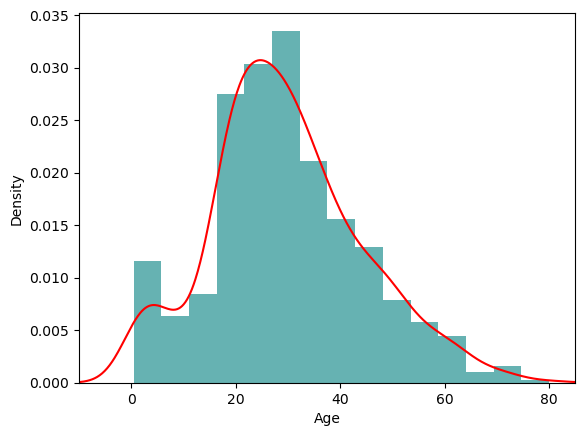

In [19]:
# Generate histogram of ages using data from training dataset
age_hist = data_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)

# Overlay density plot on top of histogram
data_train["Age"].plot(kind='density', color='red')

# Set x-axis label for histogram
age_hist.set(xlabel='Age')

# Set x-axis limits for histogram
plt.xlim(-10, 85)

# Display the plot
plt.show()


In [20]:
# mean age
print('The mean of "Age" is %.2f' %(data_train["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(data_train["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


## Adjustments to Data (Train)

In [22]:
data_train = data_train.copy()
data_train["Age"].fillna(data_train["Age"].median(skipna=True), inplace=True)

# check missing values in adjusted train data
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Age - Missing Values - test data

In [24]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((data_test['Age'].isnull().sum()/data_test.shape[0])*100))

Percent of missing "Age" records is 20.57%


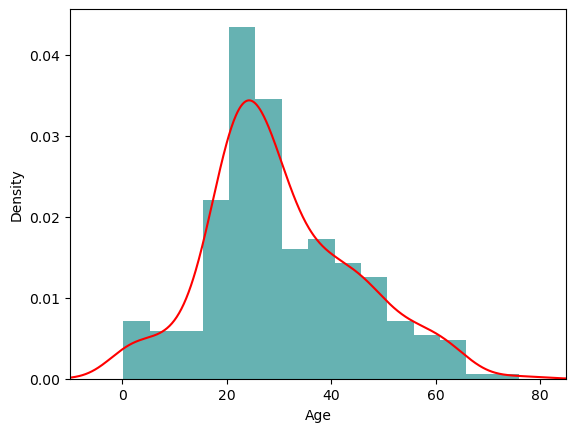

In [25]:
# Generate histogram of ages using data from training dataset
age_hist = data_test["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)

# Overlay density plot on top of histogram
data_test["Age"].plot(kind='density', color='red')

# Set x-axis label for histogram
age_hist.set(xlabel='Age')

# Set x-axis limits for histogram
plt.xlim(-10, 85)

# Display the plot
plt.show()

## Adjustments to Data (Test)

In [27]:
data_test = data_test.copy()
data_test["Age"].fillna(data_train["Age"].median(skipna=True), inplace=True)

# check missing values in adjusted train data
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Cleaning Data

In [28]:
#remove unnecessary columns and save

data_train.drop(["Name","Cabin","Ticket","Embarked"],axis = 1,inplace = True)

data_test.drop(["Name","Cabin","Ticket","Embarked"],axis = 1,inplace = True)

In [29]:
#Split dataframe into 'survived' and 'not survived' for data visualization

data_survived = data_train[data_train['Survived'] == 1].sort_values('Age')  

data_not_survived = data_train[data_train['Survived'] == 0].sort_values('Age')

In [30]:
# display survived data
data_survived.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
803,804,1,3,male,0.42,0,1,8.5167
755,756,1,2,male,0.67,1,1,14.5000
469,470,1,3,female,0.75,2,1,19.2583
644,645,1,3,female,0.75,2,1,19.2583
831,832,1,2,male,0.83,1,1,18.7500


In [31]:
# display not survived data
data_not_survived.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
386,387,0,3,male,1.0,5,2,46.9000
164,165,0,3,male,1.0,4,1,39.6875
205,206,0,3,female,2.0,0,1,10.4625
824,825,0,3,male,2.0,4,1,39.6875
119,120,0,3,female,2.0,4,2,31.2750


## Data prepared for line plot

In [32]:
#Data use for line plot

survived_age_number = data_survived.Age.value_counts(sort = False,dropna = True)#How many survived people are from which age

not_survived_age_number = data_not_survived.Age.value_counts(sort = False,dropna = True)

display(survived_age_number)
print("================================")
not_survived_age_number

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
58.00    3
60.00    2
62.00    2
63.00    2
80.00    1
Name: Age, Length: 65, dtype: int64

1.0     2
2.0     7
3.0     1
4.0     3
6.0     1
       ..
66.0    1
70.0    2
70.5    1
71.0    2
74.0    1
Name: Age, Length: 77, dtype: int64

In [33]:
#0.42,0.67 .. values at tail of serie and this is a wrong sort. Lets fix it.

a = survived_age_number.tail(4)#put values into a.

survived_age_number.drop([0.42,0.67,0.83,0.92],inplace = True)#delete these values from tail of serie

survived_age_number = pd.concat([a,survived_age_number],axis=0)#attach a to head of serie

survived_age_number 

60.00    2
62.00    2
63.00    2
80.00    1
0.75     2
        ..
58.00    3
60.00    2
62.00    2
63.00    2
80.00    1
Name: Age, Length: 65, dtype: int64

## Data Visualization

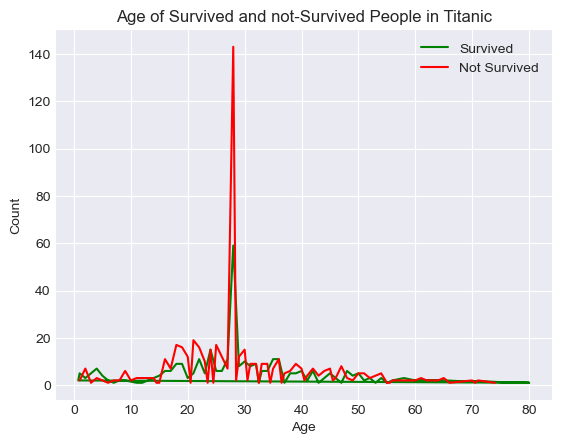

In [34]:
# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Create two lines for survived and not-survived age distributions
plt.plot(survived_age_number.index, survived_age_number, label='Survived', color='green')
plt.plot(not_survived_age_number.index, not_survived_age_number, label='Not Survived', color='red')

# Add a title and labels for the axes
plt.title('Age of Survived and not-Survived People in Titanic')
plt.xlabel('Age')
plt.ylabel('Count')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

## Count Plots

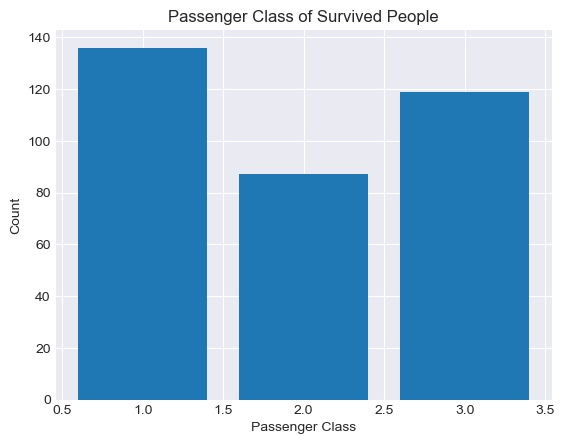

In [35]:
# disply Passenger Class of Survived People

# Create a bar chart with the counts of each passenger class
passenger_classes = data_survived['Pclass'].value_counts()
plt.bar(passenger_classes.index, passenger_classes.values)

# Set the title and labels for the chart
plt.title('Passenger Class of Survived People')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# Display the chart
plt.show()

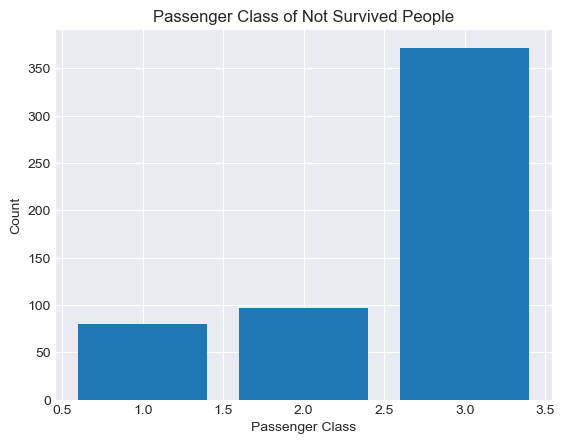

In [36]:
# disply Passenger Class of Not Survived People

# Create a bar chart with the counts of each passenger class
passenger_classes = data_not_survived['Pclass'].value_counts()
plt.bar(passenger_classes.index, passenger_classes.values)

# Set the title and labels for the chart
plt.title('Passenger Class of Not Survived People')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# Display the chart
plt.show()

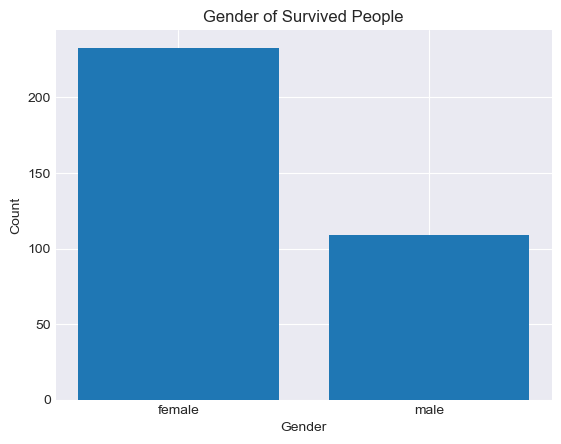

In [37]:
# display Gender of Survived People

# Create a bar chart with the counts of each gender
gender_counts = data_survived['Sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)

# Set the title and labels for the chart
plt.title('Gender of Survived People')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the chart
plt.show()

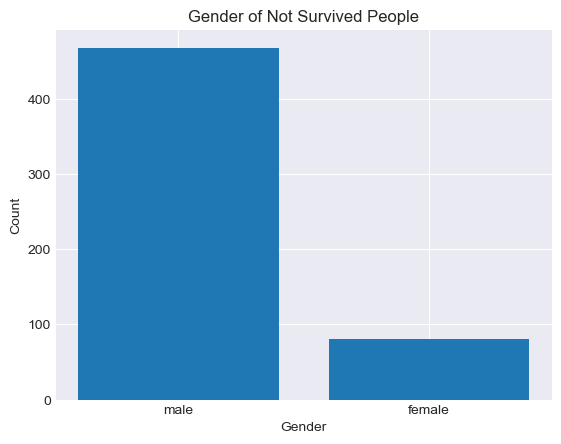

In [38]:
# display Gender of Not Survived Peoplee

# Create a bar chart with the counts of each gender
gender_counts = data_not_survived['Sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)

# Set the title and labels for the chart
plt.title('Gender of Not Survived People')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the chart
plt.show()

## Preparing data for Classification

In [39]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


## Prepare x and y data for train classification

In [40]:
# create a copy of the training data
train_data = data_train.copy()

# transform string values to binary integers
train_data['Sex'] = train_data['Sex'].apply(lambda x: 1 if x == 'male' else 0) 

# set the training labels
data_train_y = train_data['Survived'] 

# drop columns that are not required for training
train_data = train_data.drop(['PassengerId','Survived'], axis=1) 
# fill any missing values with zeros
train_data.fillna(0.0, inplace=True) 

# normalization: scale the data between 0 and 1
data_train_x = (train_data - train_data.min()) / (train_data.max() - train_data.min())
data_train_x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,1.0,0.271174,0.125,0.000000,0.014151
1,0.0,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,0.0,0.321438,0.000,0.000000,0.015469
3,0.0,0.0,0.434531,0.125,0.000000,0.103644
4,1.0,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.025374
887,0.0,0.0,0.233476,0.000,0.000000,0.058556
888,1.0,0.0,0.346569,0.125,0.333333,0.045771
889,0.0,1.0,0.321438,0.000,0.000000,0.058556


In [41]:
# create a copy of the training data
test_data = data_test.copy()

# transform string values to binary integers
test_data['Sex'] = test_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

# drop columns that are not required for training
passenger_ids = test_data['PassengerId'].values
test_data.drop(['PassengerId'], axis=1, inplace=True)
test_data.fillna(0.0, inplace=True)

# normalization: scale the data between 0 and 1
data_test = (test_data - test_data.min()) / (test_data.max() - test_data.min()).values
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,1.0,0.452723,0.000,0.000000,0.015282
1,1.0,0.0,0.617566,0.125,0.000000,0.013663
2,0.5,1.0,0.815377,0.000,0.000000,0.018909
3,1.0,1.0,0.353818,0.000,0.000000,0.016908
4,1.0,0.0,0.287881,0.125,0.111111,0.023984
...,...,...,...,...,...,...
413,1.0,1.0,0.367005,0.000,0.000000,0.015713
414,0.0,0.0,0.512066,0.000,0.000000,0.212559
415,1.0,1.0,0.505473,0.000,0.000000,0.014151
416,1.0,1.0,0.367005,0.000,0.000000,0.015713


## Split train data

In [42]:
x_train, x_test, y_train, y_test = train_test_split(data_train_x,data_train_y,test_size = 0.2,random_state=1)

score_list = [] #to keep scores of algorithms

## Implementing Logistic Regression Classification Algorithms

In [72]:
lr_model = LogisticRegression()

#train data
lr_model.fit(x_train,y_train)

score_list.append(lr_model.score(x_test,y_test))

## Prediction part

In [73]:
# Predict on test data
y_pred = lr_model.predict(x_test)
y_pred_proba = lr_model.predict_proba(x_test)[:, 1]

In [74]:
# Calculate accuracy, log loss, and auc
print('Train/Test split results:')
print(lr_model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(lr_model.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
fpr, tpr, thr = roc_curve(y_test, y_pred_proba)
print(lr_model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.788
LogisticRegression log_loss is 0.484
LogisticRegression auc is 0.832


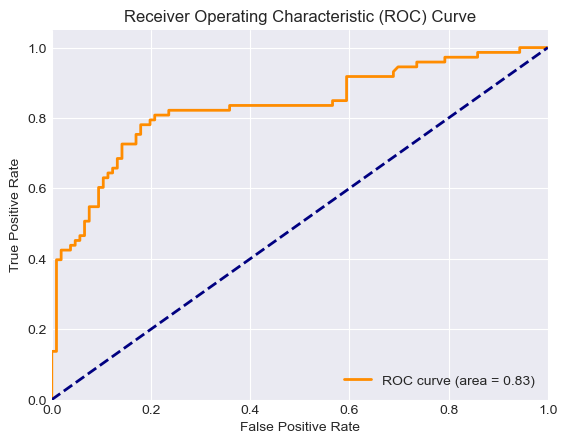

Using a threshold of 0.432 guarantees a sensitivity of 0.781 and a specificity of 0.821, i.e. a false positive rate of 17.92%.


In [76]:
# predict the probabilities and calculate the false positive rate and true positive rate
y_pred_prob = lr_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# print the threshold, sensitivity, specificity, and false positive rate at the optimal point
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_sensitivity = tpr[optimal_idx]
optimal_specificity = 1 - fpr[optimal_idx]
optimal_fpr = fpr[optimal_idx]

print("Using a threshold of %.3f" % optimal_threshold + " guarantees a sensitivity of %.3f" % optimal_sensitivity +
      " and a specificity of %.3f" % optimal_specificity + ", i.e. a false positive rate of %.2f%%." % (optimal_fpr * 100))